# COGS 108 - Project

In [124]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from pandas.plotting import scatter_matrix

# Group Members
Zeyun Wu
<br>Zhaoyue Xiang
<br>Sizhao Li
<br>Sizhe Qiu
<br>Qian Zhang
<br>Ziteng Wang

## Research Question


Is the revenue of popular movies in recent ten years propotional to rating on IMDB and MovieLens? How would other related factors affect the prediction of the revenue?

### Hypothesis


The revenue of recent popular movies is propotional to rating on IMDB and MovieLens. The factors such as genres and directors also affect correlation between revenue and rating, thus a multiple regression would make a good prediction for revenue.

### Introduction and Background

Watching movie is a major entertainment for modern people. Movies provide people with amusement and excitement widely. As the movie industry developing swiftly, our group wonder what elements may influence the box office of movies. To general understanding, the movies receives good reviews also have high revenues.
To study this issue and further explore the relationship between the revenue and rating of movies, we go through the dataset of IMDB, which includes 1,000 most popular movies in the last 10 years, and the MovieLens dataset with 700 records. The data fields included are: Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, meta score. We begin to have a general sense that revenue is proportional to ratings most times. However, there are other factors involved in the linear proportion between revenue and rating. For instance, some genres such as horror movies may be produced for minority. Those movies can receive good reviews but unable to be a huge hit. As we further analyze the dataset, we may find other factors that influence the reviews and box office of movies.

### Data Description


- Dataset Name: IMDB data from 2006 to 2016
- Link to the dataset: https://www.kaggle.com/PromptCloudHQ/imdb-data/data
- Number of observations: 1000

Describtion of dataset: It is a dataset of 1000 most popular movies on IMDB, with title, genre, description, director, actors, year, runtime, rating, votes, revenue, and metascore. 


- Dataset Name: MovieLens Latest Dataset
- Link to the dataset: https://grouplens.org/datasets/movielens/latest/
- Number of observations: 700

Describtion of dataset: a small dataset of ratings from users in MovieLens, including 100000 ratings and 1300 tag applications applied to 9000 movies by 700 users



### Data Cleaning and Pre-Processing

In [13]:
IMDBdata=pd.read_csv('integrated_data.csv')

In [22]:
IMDBdata=IMDBdata.dropna(axis=0, how='any')
IMDBdata

,Unnamed: 0,ML_votes,ML_score,ML_id,Title,Genre,Year,Rating,Votes,Revenue (Millions),Metascore,Overall
0,0,12183.0,7.855536,112852.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,8.1,757074,333.13,76.0,8.096128
1,1,6139.0,6.748493,94864.0,Prometheus,"Adventure,Mystery,Sci-Fi",2012,7.0,485820,126.46,65.0,6.996862
2,2,174.0,6.000000,5235.0,Split,"Horror,Thriller",2016,7.3,157606,138.12,62.0,7.298566
3,3,12416.0,8.055171,899.0,Sing,"Animation,Comedy,Family",2016,7.2,60545,270.32,59.0,7.345527
4,4,1805.0,5.765097,135536.0,Suicide Squad,"Action,Adventure,Fantasy",2016,6.2,393727,325.02,40.0,6.198015
5,5,225.0,6.155556,166918.0,The Great Wall,"Action,Adventure,Fantasy",2016,6.1,56036,45.13,42.0,6.100222
6,6,1847.0,7.642664,164909.0,La La Land,"Comedy,Drama,Music",2016,8.3,258682,151.06,93.0,8.295340
7,7,82.0,6.109756,169900.0,The Lost City of Z,"Action,Adventure,Biography",2016,7.1,7188,8.01,78.0,7.088831
8,8,221.0,5.927602,65567.0,Passengers,"Adventure,Drama,Romance",2016,7.0,192177,100.01,41.0,6.998768
9,9,1709.0,7.407841,135143.0,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",2016,7.5,232072,234.02,66.0,7.499326


In [23]:
del IMDBdata['Title']

In [24]:
del IMDBdata["ML_id"]

In [33]:
del IMDBdata["Unnamed: 0"]

In [34]:
#del IMDBdata["Director"]

In [35]:
#del IMDBdata["Runtime (Minutes)"]

In [36]:
IMDBdata=IMDBdata.reset_index(drop=True)

In [39]:
#The unit of time length is minute.
#The unit of Revenue is Million.
IMDBdata.columns = ["ML_votes", 'ML_score',"Genre", "Year", "Rating", "Votes",
              "Revenue", "Metascore",'Overall']

In [40]:
IMDBdata

,ML_votes,ML_score,Genre,Year,Rating,Votes,Revenue,Metascore,Overall
0,12183.0,7.855536,"Action,Adventure,Sci-Fi",2014,8.1,757074,333.13,76.0,8.096128
1,6139.0,6.748493,"Adventure,Mystery,Sci-Fi",2012,7.0,485820,126.46,65.0,6.996862
2,174.0,6.000000,"Horror,Thriller",2016,7.3,157606,138.12,62.0,7.298566
3,12416.0,8.055171,"Animation,Comedy,Family",2016,7.2,60545,270.32,59.0,7.345527
4,1805.0,5.765097,"Action,Adventure,Fantasy",2016,6.2,393727,325.02,40.0,6.198015
5,225.0,6.155556,"Action,Adventure,Fantasy",2016,6.1,56036,45.13,42.0,6.100222
6,1847.0,7.642664,"Comedy,Drama,Music",2016,8.3,258682,151.06,93.0,8.295340
7,82.0,6.109756,"Action,Adventure,Biography",2016,7.1,7188,8.01,78.0,7.088831
8,221.0,5.927602,"Adventure,Drama,Romance",2016,7.0,192177,100.01,41.0,6.998768
9,1709.0,7.407841,"Adventure,Family,Fantasy",2016,7.5,232072,234.02,66.0,7.499326


In [41]:
f= "Revenue~Rating"
[outcome_1,predictors_1]=patsy.dmatrices(f,IMDBdata)
mod_1=sm.OLS(outcome_1,predictors_1)
res_1=mod_1.fit()

In [42]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     42.80
Date:                Mon, 12 Mar 2018   Prob (F-statistic):           1.15e-10
Time:                        14:59:48   Log-Likelihood:                -4347.5
No. Observations:                 720   AIC:                             8699.
Df Residuals:                     718   BIC:                             8708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -111.5456     30.318     -3.679      0.0

In [43]:
f= "Revenue~Rating+Metascore"
[outcome_2,predictors_2]=patsy.dmatrices(f,IMDBdata)
mod_2=sm.OLS(outcome_2,predictors_2)
res_2=mod_2.fit()

In [44]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     21.48
Date:                Mon, 12 Mar 2018   Prob (F-statistic):           8.74e-10
Time:                        14:59:50   Log-Likelihood:                -4347.3
No. Observations:                 720   AIC:                             8701.
Df Residuals:                     717   BIC:                             8714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -106.9802     31.970     -3.346      0.0

In [45]:
f= "Revenue~Rating+Metascore+Votes"
[outcome_3,predictors_3]=patsy.dmatrices(f,IMDBdata)
mod_3=sm.OLS(outcome_3,predictors_3)
res_3=mod_3.fit()

In [46]:
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 12 Mar 2018   Prob (F-statistic):           2.14e-82
Time:                        14:59:51   Log-Likelihood:                -4176.6
No. Observations:                 720   AIC:                             8361.
Df Residuals:                     716   BIC:                             8379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.9488     27.427      4.264      0.0

### Data Visualization

Text(0,0.5,'Revenue(Million)')

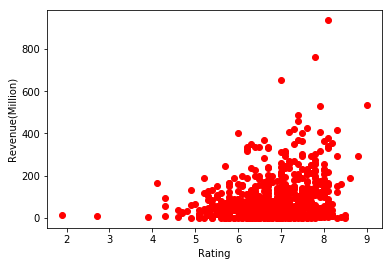

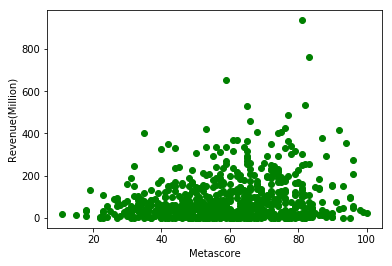

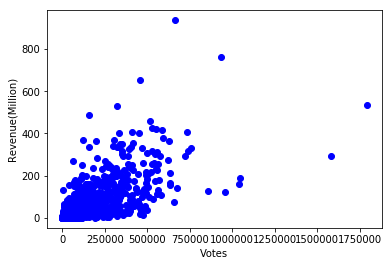

In [47]:
plt.figure(1)
x=IMDBdata['Rating']
y=IMDBdata['Revenue']
plt.plot(x,y,'ro')
plt.xlabel('Rating')
plt.ylabel('Revenue(Million)')

plt.figure(2)
x=IMDBdata['Metascore']
y=IMDBdata['Revenue']
plt.plot(x,y,'go')
plt.xlabel('Metascore')
plt.ylabel('Revenue(Million)')

plt.figure(3)
x=IMDBdata['Votes']
y=IMDBdata['Revenue']
plt.plot(x,y,'bo')
plt.xlabel('Votes')
plt.ylabel('Revenue(Million)')

Text(0.5,1,'Votes Distribution')

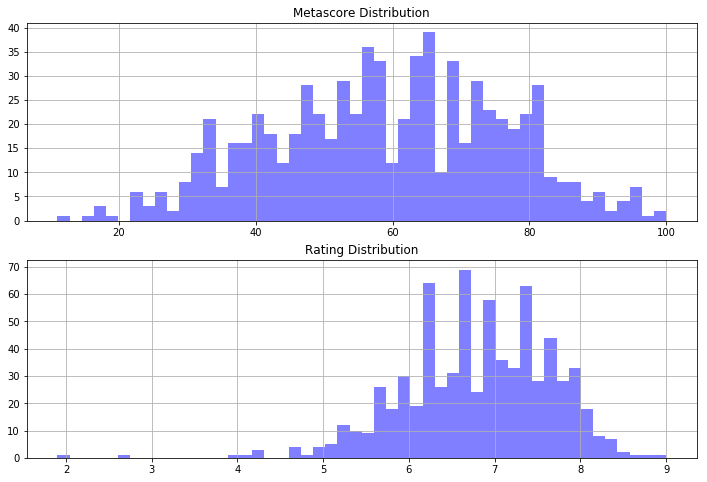

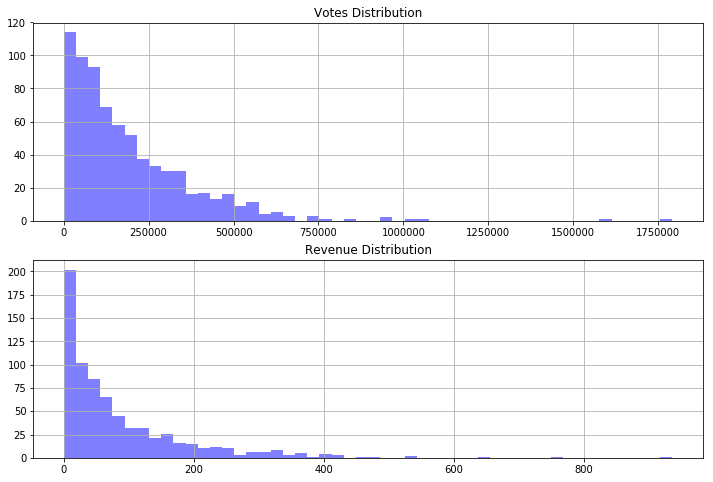

In [48]:
plt.figure(1)
plt.figure(figsize=(12,8))
plt.subplot(211)
IMDBdata.Metascore.hist(color='b', alpha=0.5, bins=50)
plt.title("Metascore Distribution")
plt.subplot(212)
IMDBdata.Rating.hist(color='b', alpha=0.5, bins=50)
plt.title("Rating Distribution")
plt.figure(2)
plt.figure(figsize=(12,8))
plt.subplot(212)
IMDBdata.Revenue.hist(color='b', alpha=0.5, bins=50)
plt.title("Revenue Distribution")
plt.subplot(211)
IMDBdata.Votes.hist(color='b', alpha=0.5, bins=50)
plt.title("Votes Distribution")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118536b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1cd91518>]], dtype=object)

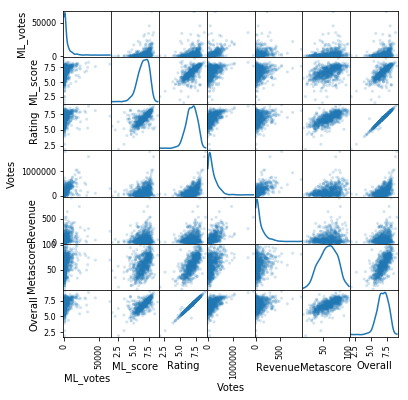

In [50]:
from pandas.plotting import scatter_matrix

df=IMDBdata.copy()
#del df["Title"]
del df['Genre']
del df['Year']
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')


In [52]:
#create 12 most popular genre sub-datasets for further analysis
df = pd.read_csv("integrated_data.csv")
df = df.drop(["Rank","Title","Director", "Actors", "Description", "Runtime (Minutes)"], axis = 1)
df = df.dropna()
df

,Unnamed: 0,ML_votes,ML_score,ML_id,Genre,Year,Rating,Votes,Revenue (Millions),Metascore,Overall
0,0,12183.0,7.855536,112852.0,"Action,Adventure,Sci-Fi",2014,8.1,757074,333.13,76.0,8.096128
1,1,6139.0,6.748493,94864.0,"Adventure,Mystery,Sci-Fi",2012,7.0,485820,126.46,65.0,6.996862
2,2,174.0,6.000000,5235.0,"Horror,Thriller",2016,7.3,157606,138.12,62.0,7.298566
3,3,12416.0,8.055171,899.0,"Animation,Comedy,Family",2016,7.2,60545,270.32,59.0,7.345527
4,4,1805.0,5.765097,135536.0,"Action,Adventure,Fantasy",2016,6.2,393727,325.02,40.0,6.198015
5,5,225.0,6.155556,166918.0,"Action,Adventure,Fantasy",2016,6.1,56036,45.13,42.0,6.100222
6,6,1847.0,7.642664,164909.0,"Comedy,Drama,Music",2016,8.3,258682,151.06,93.0,8.295340
7,7,82.0,6.109756,169900.0,"Action,Adventure,Biography",2016,7.1,7188,8.01,78.0,7.088831
8,8,221.0,5.927602,65567.0,"Adventure,Drama,Romance",2016,7.0,192177,100.01,41.0,6.998768
9,9,1709.0,7.407841,135143.0,"Adventure,Family,Fantasy",2016,7.5,232072,234.02,66.0,7.499326


In [55]:
def Genre_filter(name):
    if name == "Action":
        result = "Action"
    else:
        result = name
        
    return result

In [56]:
df1 = df['Genre'].str.split(',', expand = True)

In [57]:
df['Genre1'] = df1[0]
df['Genre2'] = df1[1]
df['Genre3'] = df1[2]

df = df.reset_index(drop = True)
df = df.drop(['Genre'], axis = 1)

df

,Unnamed: 0,ML_votes,ML_score,ML_id,Year,Rating,Votes,Revenue (Millions),Metascore,Overall,Genre1,Genre2,Genre3
0,0,12183.0,7.855536,112852.0,2014,8.1,757074,333.13,76.0,8.096128,Action,Adventure,Sci-Fi
1,1,6139.0,6.748493,94864.0,2012,7.0,485820,126.46,65.0,6.996862,Adventure,Mystery,Sci-Fi
2,2,174.0,6.000000,5235.0,2016,7.3,157606,138.12,62.0,7.298566,Horror,Thriller,None
3,3,12416.0,8.055171,899.0,2016,7.2,60545,270.32,59.0,7.345527,Animation,Comedy,Family
4,4,1805.0,5.765097,135536.0,2016,6.2,393727,325.02,40.0,6.198015,Action,Adventure,Fantasy
5,5,225.0,6.155556,166918.0,2016,6.1,56036,45.13,42.0,6.100222,Action,Adventure,Fantasy
6,6,1847.0,7.642664,164909.0,2016,8.3,258682,151.06,93.0,8.295340,Comedy,Drama,Music
7,7,82.0,6.109756,169900.0,2016,7.1,7188,8.01,78.0,7.088831,Action,Adventure,Biography
8,8,221.0,5.927602,65567.0,2016,7.0,192177,100.01,41.0,6.998768,Adventure,Drama,Romance
9,9,1709.0,7.407841,135143.0,2016,7.5,232072,234.02,66.0,7.499326,Adventure,Family,Fantasy


In [58]:
dict_1 ={} 
for index, row in df.iterrows():
    if dict_1.__contains__(row['Genre1']):
        result = dict_1[row['Genre1']]
        dict_1[row['Genre1']] = result + 1
    else:
        dict_1[row['Genre1']] = 1

for index, row in df.iterrows():
    if dict_1.__contains__(row['Genre2']):
        result = dict_1[row['Genre2']]
        dict_1[row['Genre2']] = result + 1
    else:
        dict_1[row['Genre2']] = 1
        
for index, row in df.iterrows():
    if dict_1.__contains__(row['Genre3']):
        result = dict_1[row['Genre3']]
        dict_1[row['Genre3']] = result + 1
    else:
        dict_1[row['Genre3']] = 1

In [60]:
dict_1

{'Action': 245,
 'Adventure': 219,
 'Horror': 71,
 'Animation': 41,
 'Comedy': 218,
 'Biography': 57,
 'Drama': 351,
 'Crime': 111,
 'Mystery': 70,
 'Sci-Fi': 95,
 'Fantasy': 75,
 'Thriller': 125,
 'Family': 46,
 None: 266,
 'Romance': 101,
 'History': 23,
 'Music': 14,
 'Western': 4,
 'War': 9,
 'Musical': 5,
 'Sport': 14}

In [61]:
del dict_1[None]

In [62]:
for key, value in list(dict_1.items()):
    if value < 50:
        del dict_1[key]

In [63]:
dict_1 = sorted(dict_1.items(), key = lambda item:item[1] , reverse = True )
dict_1

[('Drama', 351),
 ('Action', 245),
 ('Adventure', 219),
 ('Comedy', 218),
 ('Thriller', 125),
 ('Crime', 111),
 ('Romance', 101),
 ('Sci-Fi', 95),
 ('Fantasy', 75),
 ('Horror', 71),
 ('Mystery', 70),
 ('Biography', 57)]

In [100]:
df_Action = df[(df['Genre1']=='Action') | (df['Genre2']=='Action')| (df['Genre3'] == 'Action')]
df_Drama = df[(df['Genre1']=='Drama') | (df['Genre2']=='Drama')| (df['Genre3'] == 'Drama')]
df_Comedy = df[(df['Genre1']=='Comedy') | (df['Genre2']=='Comedy')| (df['Genre3'] == 'Comedy')]
df_Adventure = df[(df['Genre1']=='Adventure') | (df['Genre2']=='Adventure')| (df['Genre3'] == 'Adventure')]
df_Thriller = df[(df['Genre1']=='Thriller') | (df['Genre2']=='Thriller')| (df['Genre3'] == 'Thriller')]
df_Crime = df[(df['Genre1']=='Crime') | (df['Genre2']=='Crime')| (df['Genre3'] == 'Crime')]
df_Romance = df[(df['Genre1']=='Romance') | (df['Genre2']=='Romance')| (df['Genre3'] == 'Romance')]
df_SciFi = df[(df['Genre1']=='Sci-Fi') | (df['Genre2']=='Sci-Fi')| (df['Genre3'] == 'Sci-Fi')]
df_Fantasy = df[(df['Genre1']=='Fantasy') | (df['Genre2']=='Fantasy')| (df['Genre3'] == 'Fantasy')]
df_Horror = df[(df['Genre1']=='Horror') | (df['Genre2']=='Horror')| (df['Genre3'] == 'Horror')]
df_Mystery = df[(df['Genre1']=='Mystery') | (df['Genre2']=='Mystery')| (df['Genre3'] == 'Mystery')]
df_Biography = df[(df['Genre1']=='Biography') | (df['Genre2']=='Biography')| (df['Genre3'] == 'Biography')]

In [101]:
df_Biography

,Unnamed: 0,ML_votes,ML_score,ML_id,Year,Rating,Votes,Revenue (Millions),Metascore,Overall,Genre1,Genre2,Genre3
7,7,82.0,6.109756,169900.0,2016,7.1,7188,8.01,78.0,7.088831,Action,Adventure,Biography
10,10,1164.0,7.955326,166643.0,2016,7.8,93103,169.27,74.0,7.801918,Biography,Drama,History
15,15,1117.0,7.744852,163645.0,2016,8.2,211760,67.12,71.0,8.197612,Biography,Drama,History
17,17,45303.0,7.609297,364.0,2016,8.1,102061,51.69,69.0,7.949147,Biography,Drama,None
36,36,314.0,7.589172,166946.0,2016,7.2,37033,12.79,66.0,7.203272,Biography,Drama,History
50,50,917.0,7.500545,160980.0,2016,7.5,137608,125.07,74.0,7.500004,Biography,Drama,None
82,82,17833.0,7.000280,266.0,2015,7.0,108836,1.87,55.0,7.000039,Biography,Crime,Drama
91,91,4136.0,7.751692,105844.0,2013,8.1,486338,56.67,96.0,8.097063,Biography,Drama,History
135,135,304.0,7.302632,131796.0,2015,7.3,39723,33.31,51.0,7.300020,Biography,Drama,History
158,158,9456.0,7.799915,55247.0,2007,8.1,459304,18.35,73.0,8.093947,Adventure,Biography,Drama


In [107]:
#function to produce dataframe for plotting
#for each genre, the dataframe contains a column of years and a column of average revenue in that year
def year_average_revenue(df_genre):
    dict_genre = {}
    for years in range (2006, 2017):
        for index, row in df_genre.iterrows():
            if dict_genre.__contains__(row['Year']):
                continue
            else:
                dict_genre[years] = sum(df_genre[df['Year'] == years]['Revenue (Millions)'])/df_genre[df['Year']==years].shape[0]
    df_output = pd.DataFrame(list(dict_genre.items()), columns = ['year', 'aver_revenue'])
    return df_output
            

In [108]:
#call year_average_revenue to produce plotting dataframes for each genre
action = year_average_revenue(df_Action)
drama = year_average_revenue(df_Drama)
adventure = year_average_revenue(df_Adventure)
comedy = year_average_revenue(df_Comedy)
thriller = year_average_revenue(df_Thriller)
crime = year_average_revenue(df_Crime)
romance = year_average_revenue(df_Romance)
scifi = year_average_revenue(df_SciFi)
fantasy = year_average_revenue(df_Fantasy)
horror = year_average_revenue(df_Horror)
mystery = year_average_revenue(df_Mystery)
biography = year_average_revenue(df_Biography)


/Users/erika/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [109]:
biography

,year,aver_revenue
0,2006,10.720000
1,2007,61.686667
2,2008,17.930000
3,2009,66.935000
4,2010,57.625000
5,2011,75.610000
6,2012,159.110000
7,2013,74.477143
8,2014,126.122000
9,2015,39.357500


/Users/erika/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.
  import sys


Text(0,0.5,'Average Revenue(Million)')

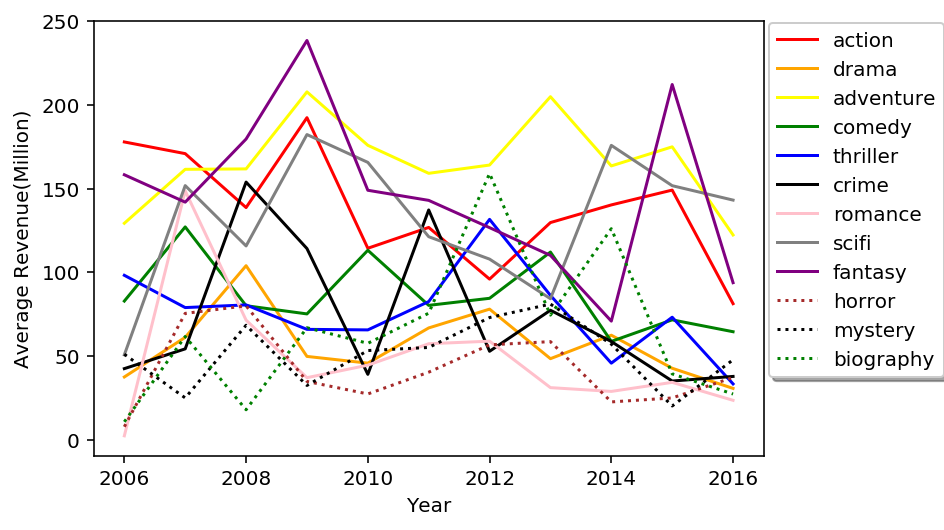

In [182]:
#genre-revenue among years
fig = plt.figure(1)
x=action['year']
y=action['aver_revenue']
plt.plot(x,y,'r-',color = 'red', label = 'action')

fig.hold()

#continue for all other popular genres
x=drama['year']
y=drama['aver_revenue']
plt.plot(x,y,'r-', color = 'orange', label = 'drama')

x=adventure['year']
y=adventure['aver_revenue']
plt.plot(x,y,'r-', color = 'yellow', label = 'adventure')

x=comedy['year']
y=comedy['aver_revenue']
plt.plot(x,y,'r-', color = 'green', label = 'comedy')

x=thriller['year']
y=thriller['aver_revenue']
plt.plot(x,y,'r-', color = 'blue', label = 'thriller')

x=crime['year']
y=crime['aver_revenue']
plt.plot(x,y,'r-', color = 'black', label = 'crime')

x=romance['year']
y=romance['aver_revenue']
plt.plot(x,y,'r-', color = 'pink', label = 'romance')

x=scifi['year']
y=scifi['aver_revenue']
plt.plot(x,y,'r-', color = 'gray', label = 'scifi')

x=fantasy['year']
y=fantasy['aver_revenue']
plt.plot(x,y,'r-', color = 'purple', label = 'fantasy')

x=horror['year']
y=horror['aver_revenue']
plt.plot(x,y,'r-', color = 'brown',ls = 'dotted', label = 'horror')

x=mystery['year']
y=mystery['aver_revenue']
plt.plot(x,y,'r-', color = 'black',ls = 'dotted', label = 'mystery')

x=biography['year']
y=biography['aver_revenue']
plt.plot(x,y,'r-', color = 'green',ls = 'dotted', label = 'biography')

legend = fig.legend(bbox_to_anchor=(0.89, 0.88), loc=2, borderaxespad=0., shadow=True)
plt.xlabel('Year')
plt.ylabel('Average Revenue(Million)')


### Data Analysis and Results

### Ethics and Privacy


The first dataset is from open-accessing website Kaggle and collected from public data provider(movie review websites). The authors of the second dataset permit the use of the dataset for any research purpose with certain conditions, which we would not violate. Moreover, the datasets we use contain no personal information. Also there is no other ethics concern.

However, since the data were collected from certain websites, it is possible that the results only reflect the views of the users from the websites, which could be biased in terms of representing general public ideas of the movies. Using dataset from single source of user group might be unappropriate to judge the reputation of the movies. To resolve the potential bias, we try to pull data from two major movie review websites, IMDB and MovieLens, in order to increase the diversity of user group. Although the user group of a major movie review website is large enough to reduce biases from individual differences, using data from two websites can still improve the diversity of the user group.


### Discussion


After our research and analysis on our datasets, if we find that the result matches our hypothesis, which means our hypothesis is correct, we will be able to provide a verification that ratings on films can give reliable reflections on economic values of films. Such verification can offer valuable assistance to guidelines on film industry about how to create a balance between film quality,which is reflected by ratings, and economic values, which can be shown by revenue.

If our methods or hypothesis get wrong, we will analyze potential sources of errors that can place other angles on our topics, which can improve our research and make the conclusion of our project more precise and constructive.

Firstly, there might be possible factors, such as popularity of certain actor,that we can not take into consideration, which can influence the correlation among varibales we study. Secondly, the fidelity of data we collect from databases can be reduced by users personal preferences and bias.

### Conclusion